In [3]:
%load_ext autoreload
%autoreload 2

from py_pol.mueller import Mueller, np, degrees
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


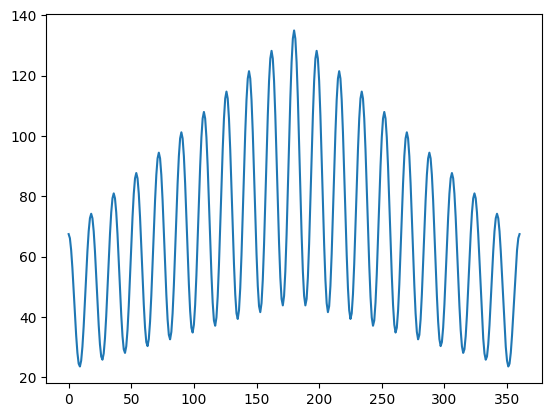

In [8]:
x = np.linspace(0, 20*np.pi, 361)
y = np.sin(x)**2

corr = np.correlate(y, y, mode='same')
plt.plot(corr)

In [ ]:
def decompose_arrow(M):
    # Separate parts
    m00, D, P, m = M.parameters.blocks(shape=[M.size])
    m = np.moveaxis(m, -1, 0)

    # Calculate singular values
    U, _, Vh = np.linalg.svd(m)

    # Restore axis order
    U = np.moveaxis(U, 0, -1)
    Vh = np.moveaxis(Vh, 0, -1)

    # Recompose the matrices
    zero = np.zeros_like(P)
    if M.size == 1:
        one = np.array([1])
    else:
        one = np.ones_like(m00)
    Mleft = Mueller("Mleft").from_blocks(M00=one, Dv=zero, Pv=zero, m=U)
    Mright = Mueller("Mright").from_blocks(M00=one, Dv=zero, Pv=zero, m=Vh)
    Marrow = Mleft.transpose(keep=True) * M * Mright.transpose(keep=True)
    Marrow.name = "Marrow"
    print(Marrow)

    return Mleft, Marrow, Mright

In [ ]:
aux = np.random.rand(4,4,3)
M = Mueller().from_matrix(aux)
print(M)
Mleft, Marrow, Mright = decompose_arrow(M)
M2 = Mleft * Marrow * Mright
print(M2)


M = 
[+0.828 +0.101 +0.223 +0.853]   [+0.797 +0.557 +0.149 +0.504]   [+0.634 +0.156 +0.914 +0.037]   
[+0.058 +0.453 +0.697 +0.108]   [+0.752 +0.421 +0.871 +0.094]   [+0.697 +0.648 +0.427 +0.174]   
[+0.884 +0.794 +0.008 +0.283]   [+0.936 +0.389 +0.523 +0.649]   [+0.574 +0.197 +0.604 +0.820]   
[+0.171 +0.805 +0.290 +0.834]   [+0.005 +0.910 +0.981 +0.591]   [+0.650 +0.359 +0.128 +0.868]   

Marrow = 
[+0.828 -0.607 +0.127 -0.635]   [+0.797 -0.623 -0.372 +0.244]   [+0.634 -0.507 +0.422 -0.653]   
[-0.597 +1.539 -0.000 +0.000]   [-0.778 +1.918 +0.000 -0.000]   [-1.070 +1.469 +0.000 -0.000]   
[+0.302 +0.000 +0.596 +0.000]   [-0.051 -0.000 +0.465 -0.000]   [+0.268 -0.000 +0.573 +0.000]   
[+0.605 -0.000 -0.000 +0.341]   [-0.913 +0.000 -0.000 +0.188]   [+0.139 +0.000 +0.000 +0.346]   

Mleft * Marrow * Mright = 
[+0.828 +0.101 +0.223 +0.853]   [+0.797 +0.557 +0.149 +0.504]   [+0.634 +0.156 +0.914 +0.037]   
[+0.058 +0.453 +0.697 +0.108]   [+0.752 +0.421 +0.871 +0.094]   [+0.697 +0.648 +0.4